# <center> Data Mining - James Eagan's dataset

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path



project_path = Path().cwd().parent
data_path = project_path / 'data'


In [299]:
sns.set_style('dark')

In [226]:
df = pd.read_csv(data_path / 'films_jeagan.csv', delimiter=";", encoding='latin-1')
df = df.drop(index=[0])
df.head(5)

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
1,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png
2,1991,113,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68,No,NicholasCage.png
3,1983,104,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79,No,NicholasCage.png
4,1979,122,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6,No,seanConnery.png
5,1978,94,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14,No,NicholasCage.png


In [227]:
df.describe()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
count,1659,1592,1659,1657,1651,1281,1406,1653,1659,1659
unique,74,161,1657,15,759,710,755,89,2,27
top,1991,90,"Island of Dr. Moreau, The",Drama,"Wayne, John","Bergman, Ingrid","Hitchcock, Alfred",8,No,NicholasCage.png
freq,129,74,2,655,81,27,34,50,1496,1151


In [209]:
df.isnull().sum()

Year            0
Length         67
Title           0
Subject         2
Actor           8
Actress       378
Director      253
Popularity      6
Awards          0
*Image          0
dtype: int64

# Some KPI

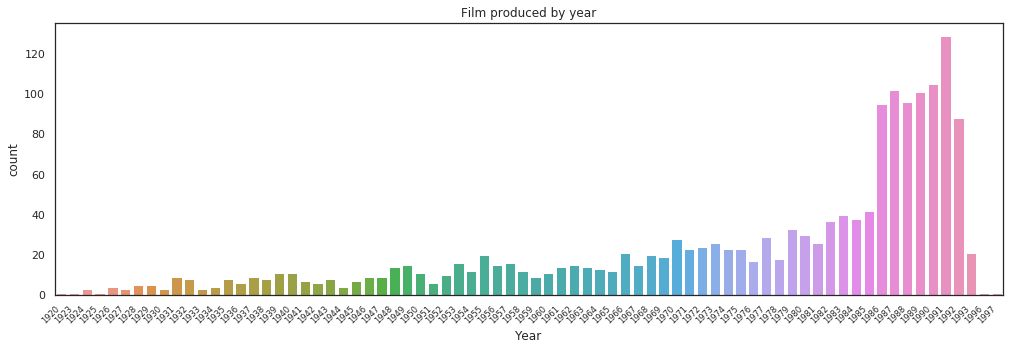

In [198]:
plt.figure(figsize=(17,5))
chart = sns.countplot(x="Year", data=df)
plt.title('Film produced by year')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-small'  
)

plt.show()

In [229]:
df[df['Title'].duplicated()]

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
187,1953,61,White Lightning,NaN,"Clements, Stanley","Blondell, Gloria","Bernds, Edward",NaN,No,NicholasCage.png
236,1977,104,"Island of Dr. Moreau, The",Horror,"Lancaster, Burt","Carrera, Barbara","Taylor, Don",54,No,burtLancaster.png


In [334]:
tmp = df.dropna()
tmp.shape
tmp[['Lenght', 'Popularity']] = tmp[['Lenght', 'Popularity']].apply(pd.to_numeric) 

KeyError: "['Lenght'] not in index"

In [316]:
new = tmp.groupby(['Year']).agg({'Length':['mean','min','max'], 'Popularity':['mean','min','max']})
new.reset_index()
new['Year'].astype(int)

DataError: No numeric types to aggregate

In [305]:
new2.Year.astype(int)

0     1924
1     1925
2     1926
3     1927
4     1928
      ... 
67    1991
68    1992
69    1993
70    1996
71    1997
Name: Year, Length: 72, dtype: int64

In [277]:
columns_name = new2.columns
for i in columns_name:
    print(i)

('Year', '')
('Length', 'mean')
('Length', 'min')
('Length', 'max')
('Popularity', 'mean')
('Popularity', 'min')
('Popularity', 'max')


TypeError: can only concatenate str (not "int") to str

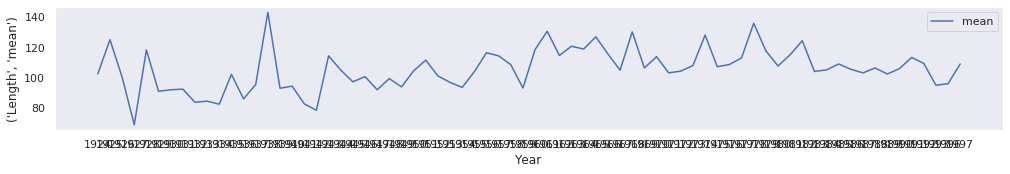

In [300]:
plt.figure(figsize=(17,5))
plt.subplot(211)
for i in columns_name[1:4]:
    sns.lineplot(new2.Year, new2[i])
    plt.legend(['mean', 'min','max'])
    plt.xticks(np.arange(min(new2.Year), max(new2.Year)+1, 1.0))
plt.subplot(212)
for i in columns_name[4:]:
    sns.lineplot(new2.Year, new2[i])
    plt.legend(['mean', 'min','max'])